In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [3]:
# Load Data & Preprocessing
df = pd.read_csv('Housing.csv') 


print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:\n", df.head())

print("\nColumns:", df.columns.tolist())

Dataset Shape: (545, 13)

First 5 rows:
       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  

Columns: ['price', 'area', 'bedrooms', 'bathrooms', 'stor

In [4]:
# view dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
# view summary statistics
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [6]:
# Check for duplicates 
df.loc[df.duplicated()]

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus


In [7]:
# Check for missing values
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

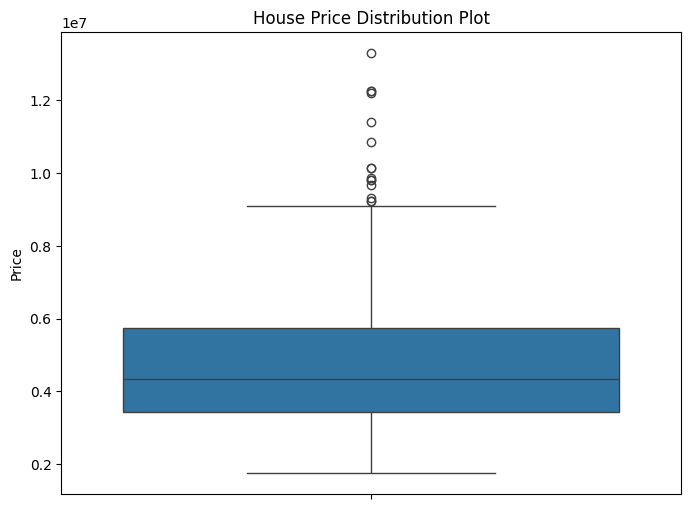

In [8]:
# Visualize target variable distribution
plt.figure(figsize=(8, 6))
plt.title('House Price Distribution Plot')
sns.boxplot(y=df['price'])
plt.ylabel('Price')
plt.show()

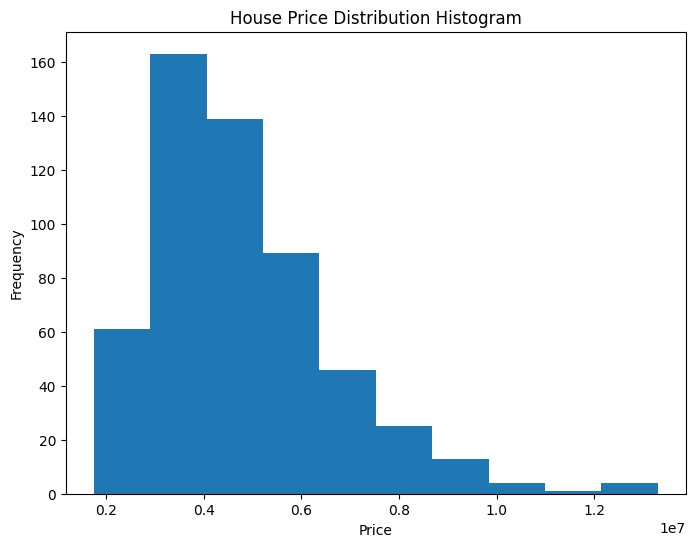

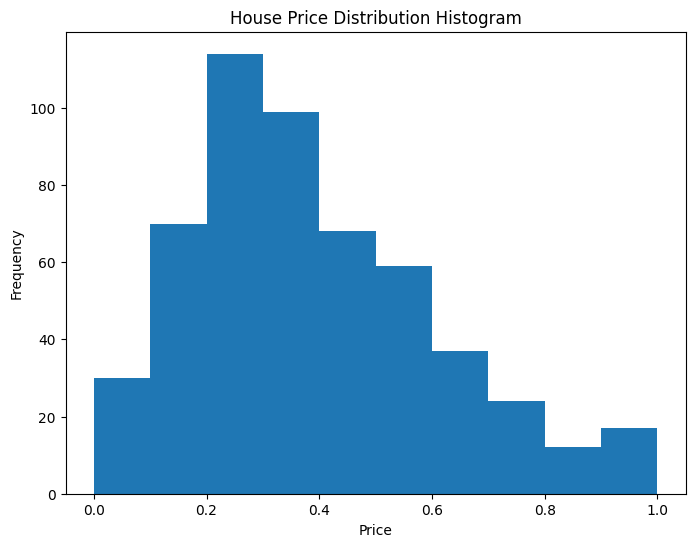

Mean Squared Error: 0.04617525337728656

Feature Coefficients:
      Coefficient
area     0.682019


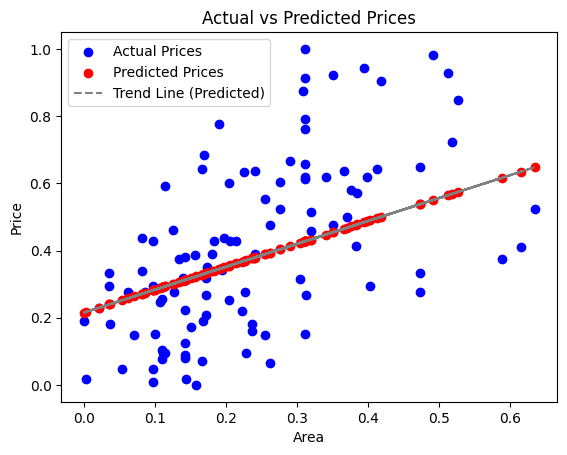

In [9]:
# Simple Linear Regression Model -> Predict Housing Prices based on area only
#----------------------------------------------------------------------------

# Histogram of 'price' before scaling & outlier removal
plt.figure(figsize=(8, 6))
plt.hist(df['price'])
plt.title('House Price Distribution Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Remove outliers from 'price' using IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Define features and target
X = df_no_outliers[['area']]  # Feature: area
y = df_no_outliers[['price']]   # Target: price

# Data Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)


# Histogram of 'price' after scaling & outlier removal
plt.figure(figsize=(8, 6))
plt.hist(y_scaled)
plt.title('House Price Distribution Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Display coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nFeature Coefficients:")
print(coefficients)

# Visualize the results
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.scatter(X_test, y_pred, color='red', label='Predicted Prices')
# Add regression line (linear fit for predicted prices vs. area)
z = np.polyfit(X_test.flatten(), y_pred.flatten(), 1)  # Linear fit for predicted prices
p = np.poly1d(z)
plt.plot(X_test, p(X_test), color='gray', linestyle='--', label='Trend Line (Predicted)')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

Mean Squared Error (MSE): 0.01

Feature Coefficients:
                            Feature  Coefficient
0                              area     0.297259
1                          bedrooms     0.033238
2                         bathrooms     0.284271
3                           stories     0.105838
4                           parking     0.058400
5                      mainroad_yes     0.031855
6                     guestroom_yes     0.020053
7                      basement_yes     0.033788
8               hotwaterheating_yes     0.059277
9               airconditioning_yes     0.068522
10                     prefarea_yes     0.054536
11  furnishingstatus_semi-furnished    -0.010985
12     furnishingstatus_unfurnished    -0.035813


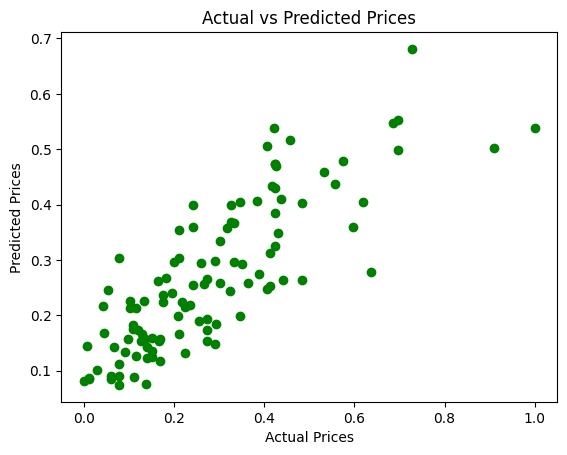

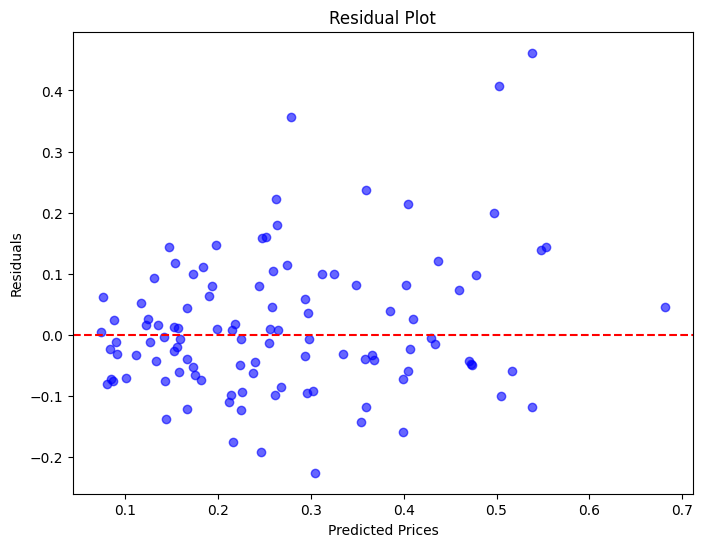

In [10]:
# Multiple Linear Regression Model -> Predict Housing Prices based on multiple features
#----------------------------------------------------------------------------

# Define features and target
X = df.drop('price', axis=1)  # All columns except 'price'
y = df['price']  # Target variable 

# Identify categorical and numerical columns
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                    'airconditioning', 'prefarea', 'furnishingstatus']
numerical_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

# Preprocessing: One-hot encode categorical variables, scale numerical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_cols),  # Scale numerical features
        ('cat', OneHotEncoder(drop='first'), categorical_cols)  # Encode categorical features
    ])

y = MinMaxScaler().fit_transform(y.values.reshape(-1, 1)).ravel()
# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train) 

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")

# Feature importance (coefficients)
feature_names = (numerical_cols + 
                 preprocessor.named_transformers_['cat']
                 .get_feature_names_out(categorical_cols).tolist())
coefficients = pd.DataFrame({'Feature': feature_names, 'Coefficient': model.coef_})
print("\nFeature Coefficients:")
print(coefficients)

# Visualize Actual vs Predicted Prices
plt.scatter(y_test, y_pred, color='green')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()

# Residual plot to check model assumptions
plt.figure(figsize=(8, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, color='blue', alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()